<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Inference/Mv-g-and-k-distribution/mvgandk_optim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate G-and-k distribution

Notebook for the estimation of the model parameters

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

Set path for saving the results (adjust if necessary):

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Inference/'

In [ ]:
append = True # True: previous results will be loaded, False: new optimisation

In [ ]:
if append:
  res = np.load(path+'mvgandk_mmd2_optim_d=1_vstat_RQMC_eta=0.2.npz')
  #res = np.load(path+'mvgandk_mmd2_optim_d=2_vstat_RQMC_eta=0.2.npz')
  #res = np.load(path+'mvgandk_mmd2_optim_d=5_vstat_RQMC_eta=0.2.npz')
  #res = np.load(path+'mvgandk_mmd2_optim_d=10_vstat_RQMC_eta=0.2.npz')
  #res = np.load(path+'mvgandk_mmd2_optim_d=15_vstat_RQMC_eta=0.2.npz')
  #res = np.load(path+'mvgandk_mmd2_optim_d=20_vstat_RQMC_eta=0.2.npz')
  #res = np.load(path+'mvgandk_mmd2_optim_d=25_vstat_RQMC_eta=0.2.npz')
  res_theta = res['theta']
  res_loss = res['loss']
  print(res_theta.shape)

(40001, 5)


### Imports

In [ ]:
import numpy as np

### Optimisation

In [ ]:
np.random.seed(11)

Set parameters:

In [ ]:
#m = 2**13                                        # number of true data points
m = 2**16                                         # number of true data points
m_sub = 2**11                                     # number of true data points
n = 2**9                                          # number of simulated data points
theta_star = np.array([3,1,1,-np.log(2),0.1])     # true theta
d = 1                                            # dimensions of data
p = theta_star.shape[0]                           # dimensions of parameter space
kernel = 'gaussian'                               # 'gaussian' or 'imq'
l = 1.5*d**(1/2)                                  # lengthscale for Gaussian kernel (l=-1 for median heuristic)
c=1                                               # parameter c for IMQ kernel
b=-0.5                                            # parameter beta for IMQ kernel
nu = 0                                            # parameter nu for matern kernel
method_gd = 'SGD'                                 # SGD or NSGD
eta = 0.2                                         # step size
max_it = 10000                                    # number of descent steps
if append:
  start = res_theta[-1]                           # start from previous result
else:
  start = np.ones(p)*0.3                          # start values
inv = True                                        # True: use inverse transform, False: use Box-Muller transform
stat_type = 'v'                                   # 'u': U-statistic, 'v': V-statistic
method_sampling = 'RQMC'                            # 'MC' or 'RQMC'

Sample from the g-and-k distribution:

In [ ]:
if inv:
  y,_ = sample_mvgandk_inv('MC',m,d,theta_star)
else:
  y,_ = sample_mvgandk('MC',m,d,theta_star)

Gradient descent:

In [ ]:
if inv:
  theta,loss = optim_inv('mvgandk',method_sampling,method_gd,eta,max_it,l,c,b,nu,n,m_sub,d,p,y,start,stat_type,kernel)
else:
  theta,loss = optim('mvgandk',method_sampling,method_gd,eta,max_it,l,c,b,nu,n,m,d,p,y,start,stat_type,kernel)

iteration: 1000 
loss:      0.000251 
estimate:  [ 3.003  1.009  0.994 -0.714  0.3  ] 
gradient:  [ 0.009  0.001  0.    -0.     0.   ]
iteration: 2000 
loss:      0.0002192 
estimate:  [ 3.004  1.009  0.993 -0.71   0.3  ] 
gradient:  [-0.008  0.005 -0.001  0.005  0.   ]
iteration: 3000 
loss:      0.0002577 
estimate:  [ 3.004  1.006  0.99  -0.715  0.3  ] 
gradient:  [ 0.01  -0.001  0.001 -0.001  0.   ]
iteration: 4000 
loss:      0.0001052 
estimate:  [ 3.004  1.007  0.993 -0.713  0.3  ] 
gradient:  [0.003 0.001 0.001 0.001 0.   ]
iteration: 5000 
loss:      1.24e-05 
estimate:  [ 3.004  1.008  0.996 -0.713  0.3  ] 
gradient:  [-0.001  0.001 -0.     0.001  0.   ]
iteration: 6000 
loss:      7.63e-05 
estimate:  [ 3.002  1.004  0.996 -0.709  0.3  ] 
gradient:  [ 0.003 -0.005  0.001 -0.004  0.   ]
iteration: 7000 
loss:      0.0003165 
estimate:  [ 3.002  1.01   0.992 -0.705  0.3  ] 
gradient:  [-0.002 -0.007  0.001 -0.004  0.   ]
iteration: 8000 
loss:      0.0003345 
estimate:  [ 3.00

### Visualise results

In [ ]:
it = 10000

Plot the loss:

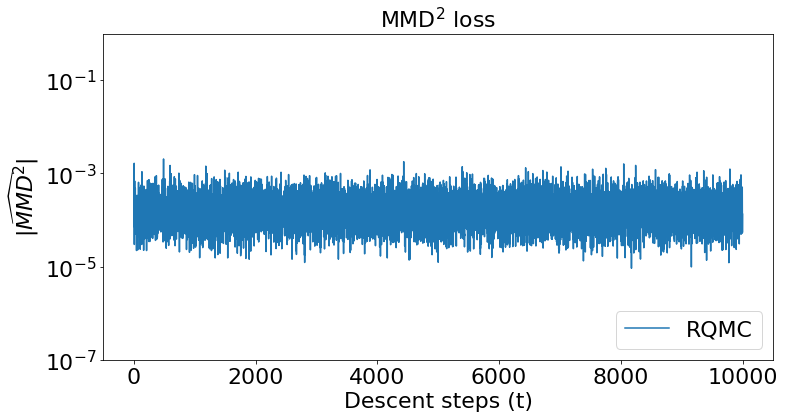

In [ ]:
plot_loss(it,d,(12,6),loss,method_sampling)

Plot the estimates:

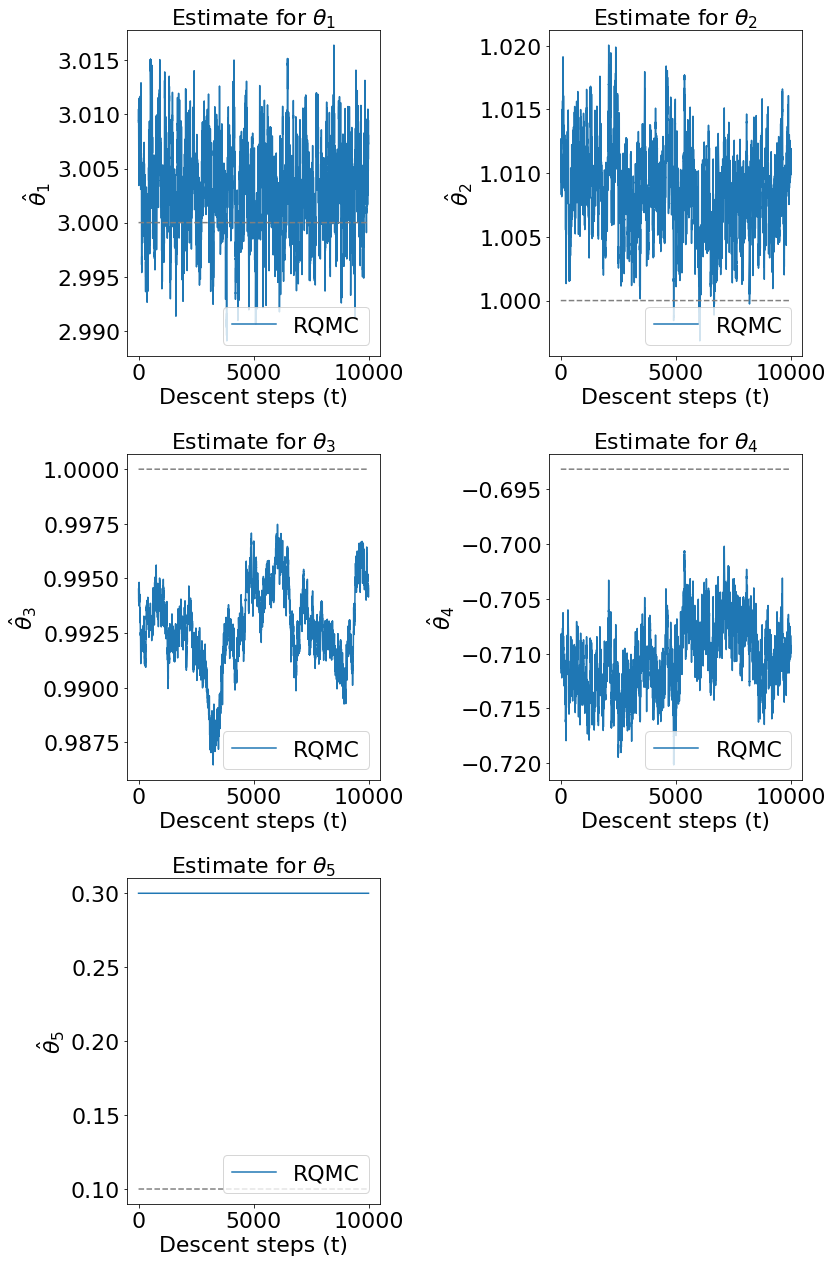

In [ ]:
plot_estimates(2,p,d,(12,((p//2)+(p%2))*6),max_it,theta,theta_star,method_sampling)

Save the results:

In [ ]:
if append:
  loss = np.append(res_loss,loss)
  theta = np.vstack([res_theta,theta[1:]])

In [ ]:
np.savez(path+"mvgandk_mmd2_optim_d=%s_%sstat_%s_eta=%s.npz" %(d,stat_type,method_sampling,eta),loss=loss,theta=theta)